<a href="https://www.kaggle.com/code/onyekaonwudinjor/spaceship-titanic-notebook?scriptVersionId=123178497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
spaceship_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
spaceship_train.head(5)

test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
spaceship_train.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Checking for Null values
spaceship_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Observation - Except for Transported and PassengerID, all other columns have null values

In [5]:
spaceship_train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [6]:
#Drop columns
spaceship_train.drop(columns=["PassengerId", "Destination","Name", "Cabin"], axis=1, inplace=True)

### Feature Engineering

### We would fill the categorical data with the "Most frequent" data

In [7]:
imp = SimpleImputer(strategy="most_frequent")
spaceship_train['HomePlanet'] = imp.fit_transform(spaceship_train[['HomePlanet']])

imp = SimpleImputer(strategy="most_frequent")
spaceship_train['CryoSleep'] = imp.fit_transform(spaceship_train[['CryoSleep']])

#imp = SimpleImputer(strategy="most_frequent")
#spaceship_train['Destination'] = imp.fit_transform(spaceship_train[['Destination']])

imp = SimpleImputer(strategy="most_frequent")
spaceship_train['VIP'] = imp.fit_transform(spaceship_train[['VIP']])

### Fill the numeric data with their "mean values" and "0"

In [8]:
imp = SimpleImputer(strategy="median")
spaceship_train['Age'] = imp.fit_transform(spaceship_train[['Age']])

imp = SimpleImputer(strategy='constant', fill_value=0)
spaceship_train['RoomService']=imp.fit_transform(spaceship_train[['RoomService']])

imp = SimpleImputer(strategy='constant', fill_value=0)
spaceship_train['FoodCourt']=imp.fit_transform(spaceship_train[['FoodCourt']])

imp = SimpleImputer(strategy='constant', fill_value=0)
spaceship_train['ShoppingMall']=imp.fit_transform(spaceship_train[['ShoppingMall']])

imp = SimpleImputer(strategy='constant', fill_value=0)
spaceship_train['Spa']=imp.fit_transform(spaceship_train[['Spa']])

imp = SimpleImputer(strategy='constant', fill_value=0)
spaceship_train['VRDeck']=imp.fit_transform(spaceship_train[['VRDeck']])

In [9]:
spaceship_train.head(2)

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True


In [10]:
spaceship_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
spaceship_train.Transported.value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [12]:
spaceship_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

### Exploring the Train Data

In [13]:
spaceship_train['AgeGroup'] = pd.cut(spaceship_train.Age,bins=[0, 5, 12, 18, 50,100], labels=['Baby','Child','Teen', 'Adult','Elderly'])

In [14]:
numerical_data = [features for features in spaceship_train.columns if spaceship_train[features].dtype != "object" and features not in ("Transported")]
categorical_data = [features for features in spaceship_train.columns if spaceship_train[features].dtype == "object"]

print("Numerical features are: ", numerical_data)
print("Categorical features are: ",categorical_data)

Numerical features are:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'AgeGroup']
Categorical features are:  ['HomePlanet', 'CryoSleep', 'VIP']


In [15]:
# Reassigning of data
space_num = spaceship_train[numerical_data] 
space_cat = spaceship_train[categorical_data]



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

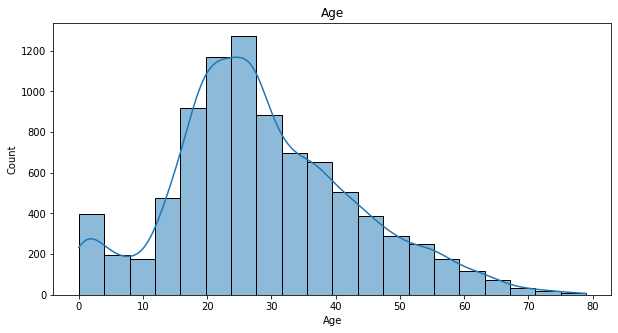

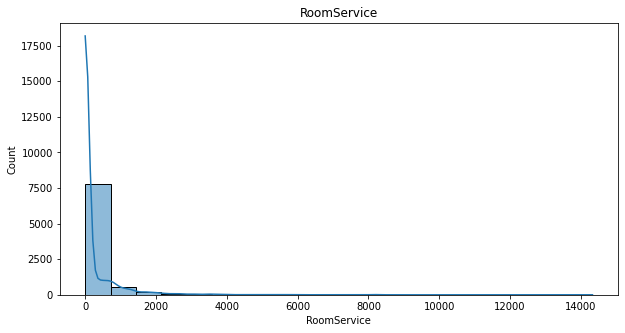

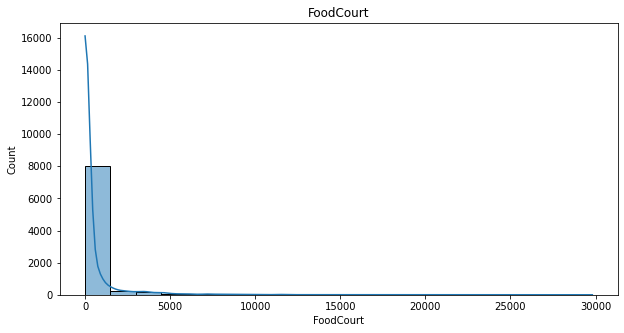

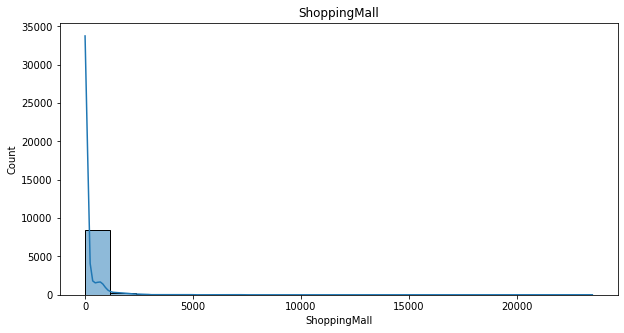

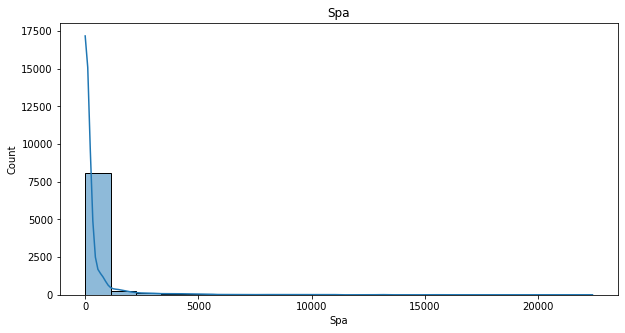

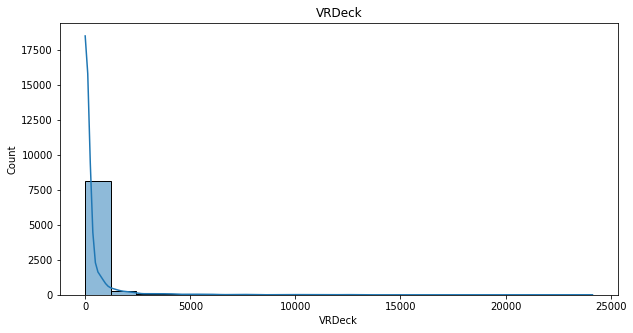

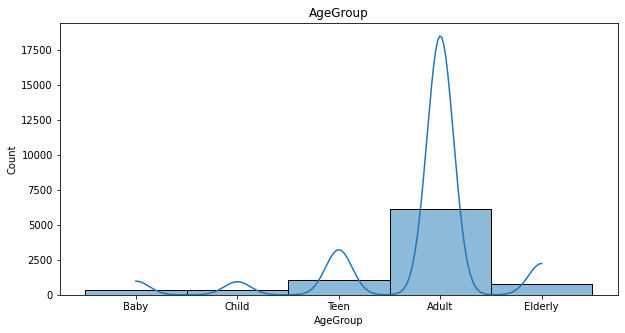

In [17]:
# We need to plot a histogram for the numerical features

for cols in numerical_data:
    plt.figure(figsize=(10,5))
    sns.histplot(space_num[cols],bins = 20,kde=True)
    plt.title(cols)

<AxesSubplot:>

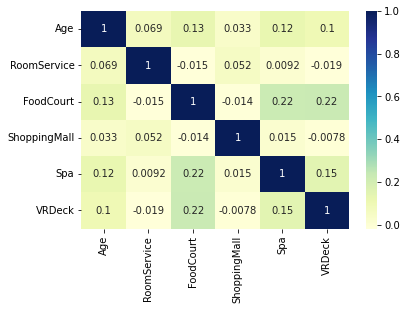

In [18]:
# Determining the correlation 
sns.heatmap(space_num.corr(),annot = True, cmap="YlGnBu")

From the analysis with the heatmap, there do not seem to be a strong correlation between the numerical features.

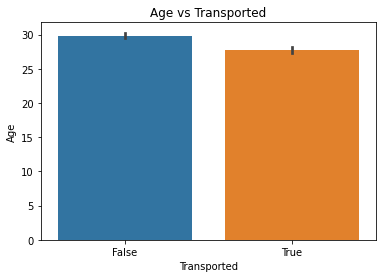

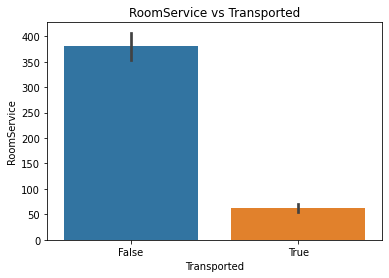

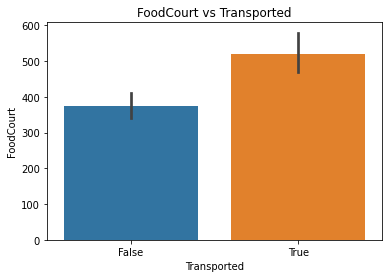

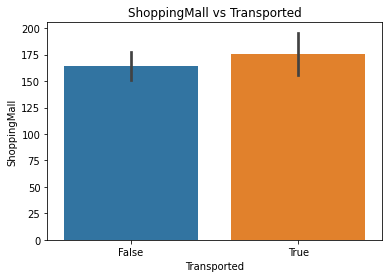

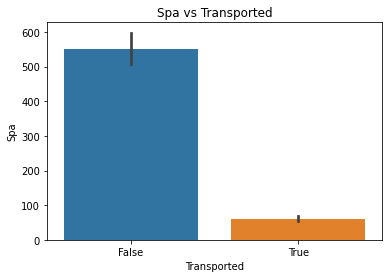

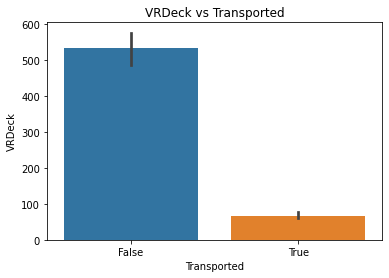

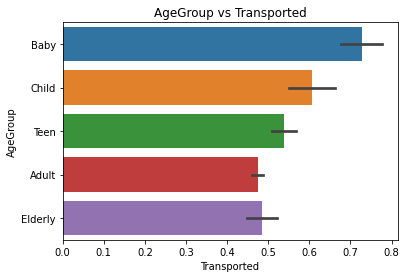

In [19]:
# Compare the numerical features with the annotation

for cols in numerical_data:
    sns.barplot(spaceship_train["Transported"],space_num[cols])
    plt.title("{} vs Transported".format(cols))
    plt.show()

In [20]:
space_cat.head(2)

,HomePlanet,CryoSleep,VIP
0,Europa,False,False
1,Earth,False,False


In [21]:
#print(spaceship_train["Destination"].unique())
print(spaceship_train["HomePlanet"].unique())
print(spaceship_train["CryoSleep"].unique())
print(spaceship_train["VIP"].unique())

['Europa' 'Earth' 'Mars']
[False True]
[False True]


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

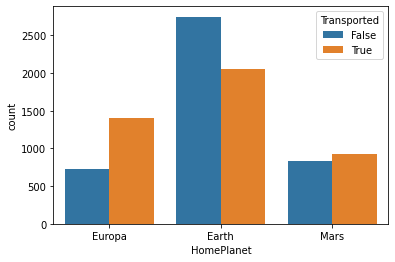

In [22]:
# We need to plot a barplot for the categorical features, in consideration of the annotation

sns.countplot(data = spaceship_train, x = "HomePlanet", hue="Transported")

In [23]:
#sns.countplot(data = spaceship_train, x = "Destination", hue="Transported")

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

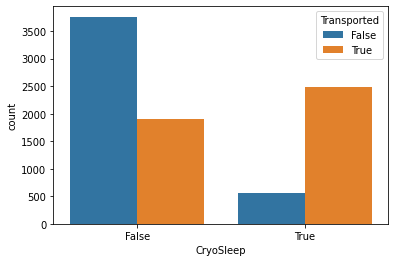

In [24]:
sns.countplot(data = spaceship_train, x = "CryoSleep", hue="Transported")

<AxesSubplot:xlabel='VIP', ylabel='count'>

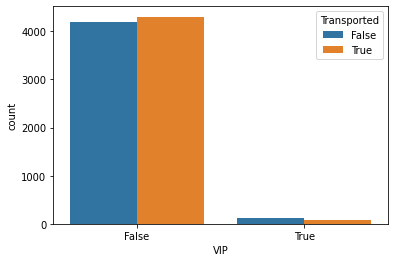

In [25]:
sns.countplot(data = spaceship_train, x = "VIP", hue = "Transported")

### Reports on the features on correlation with the labels

**A. Updates on numerical data analysis:**

1. More adult categories between the ages of 20-25 on the spaceship, however more babies and children where transported compared to the other categories in the AgeGroup.

2. There is no correlation between passengers that used the RoomService and those taht were transported, however the percentage of passengers that used the foodCourt has a higher percentage than those transported.

3. The percentage of the passengers that that were transported compared to those that used the shopping mall was higher with a minimal percentage.

4. Spa and VRDeck has very little correlation compared to passengers that were transported.

**B. Updates on the categorical data analysis:**

1. For the HomePlanet, Europa has a larger number of passengers that were transported and Earth has the largest number of passengers onbard the spaceship but the least number of passengers transported compared to Mars and Europa

2. The percentage of the passengers that refused to stay in the CryoSleep are more than those that opted for CryoSleep. We noticed from the analysis that the percentage of the passengers that opted for CryoSleep that were transported are more than passengers that did not opt for CryoSleep.

3. The number of passengers under the VIP category was very little compared to the regular passengers and the number of passengers transported were reasonably distributed by almost 50%.

In [26]:
from sklearn.preprocessing import LabelEncoder


In [27]:
lencoder = LabelEncoder()
spaceship_train.HomePlanet = lencoder.fit_transform(spaceship_train.HomePlanet)
#spaceship_train.Destination = lencoder.fit_transform(spaceship_train.Destination)
spaceship_train.CryoSleep = lencoder.fit_transform(spaceship_train.CryoSleep)
spaceship_train.AgeGroup = lencoder.fit_transform(spaceship_train.AgeGroup)

In [28]:
spaceship_train1 = pd.get_dummies(spaceship_train)


In [29]:
spaceship_train1['Transported']=spaceship_train1['Transported'].replace({True:1,False:0})

spaceship_train1.head(3)

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup,VIP_False,VIP_True
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,1,0
2,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,3,0,1


### Exploring the Test Data

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [31]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [32]:
test_data.drop(columns=["Name", "Cabin","Destination"], axis=1, inplace=True)

In [33]:
imp = SimpleImputer(strategy="most_frequent")
test_data['HomePlanet'] = imp.fit_transform(test_data[['HomePlanet']])

imp = SimpleImputer(strategy="most_frequent")
test_data['CryoSleep'] = imp.fit_transform(test_data[['CryoSleep']])

#imp = SimpleImputer(strategy="most_frequent")
#test_data['Destination'] = imp.fit_transform(test_data[['Destination']])

imp = SimpleImputer(strategy="most_frequent")
test_data['VIP'] = imp.fit_transform(test_data[['VIP']])

In [34]:
imp = SimpleImputer(strategy="median")
test_data['Age'] = imp.fit_transform(test_data[['Age']])

imp = SimpleImputer(strategy='constant', fill_value=0)
test_data['RoomService']=imp.fit_transform(test_data[['RoomService']])

imp = SimpleImputer(strategy='constant', fill_value=0)
test_data['FoodCourt']=imp.fit_transform(test_data[['FoodCourt']])

imp = SimpleImputer(strategy='constant', fill_value=0)
test_data['ShoppingMall']=imp.fit_transform(test_data[['ShoppingMall']])

imp = SimpleImputer(strategy='constant', fill_value=0)
test_data['Spa']=imp.fit_transform(test_data[['Spa']])

imp = SimpleImputer(strategy='constant', fill_value=0)
test_data['VRDeck']=imp.fit_transform(test_data[['VRDeck']])

In [35]:
test_data['AgeGroup'] = pd.cut(test_data.Age,bins=[0, 5, 12, 18, 50,100], labels=['Baby','Child','Teen', 'Adult','Elderly'])

In [36]:
lencoder = LabelEncoder()
test_data.HomePlanet = lencoder.fit_transform(test_data.HomePlanet)
test_data.CryoSleep = lencoder.fit_transform(test_data.CryoSleep)
#test_data.Destination = lencoder.fit_transform(test_data.Destination)
test_data.AgeGroup = lencoder.fit_transform(test_data.AgeGroup)

In [37]:
test_data1 = pd.get_dummies(data=test_data,columns=["VIP"],drop_first=True)
test_data1.tail(2)

,PassengerId,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AgeGroup,VIP_True
4275,9273_01,1,0,26.0,0.0,2680.0,0.0,0.0,523.0,0,0
4276,9277_01,0,1,43.0,0.0,0.0,0.0,0.0,0.0,0,0


In [38]:
PassengerId = test_data1.PassengerId

In [39]:
X = spaceship_train1.drop("Transported", axis=1).values
X.shape

(8693, 11)

In [40]:
y = spaceship_train1.Transported.values
y.shape

(8693,)

## Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Using Standard Scaler

In [43]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)  ****


Fitting Logistic Regression to the Dataset

In [44]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

In [45]:
#model = LogisticRegression()

In [46]:
#model.fit(X_train, y_train)

In [47]:
#model.score(X_train, y_train)

In [48]:
#predY = model.predict(X_test)
#test_acc = accuracy_score(y_test,predY)
#print("The Accuracy for Test set is {}" .format(test_acc))

### Optimizing the model with Cross Validation and GridSearchcv

In [49]:
#from sklearn.model_selection import cross_val_score
#import warnings
#warnings.filterwarnings('ignore')

In [50]:
#scores = cross_val_score(model, X, y, cv=5)

In [51]:
#scores

In [52]:
#from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings('ignore')

In [53]:
#parm = {"penalty":["l1", "l2"], "max_iter":[100, 1000, 10000]}

#parm = {'penalty' : ['l1','l2'], 'C': np.logspace(-2,2,100), 'solver' : ['newton-cg', 'lbfgs', 'liblinear'],} 

In [54]:
#gs_model = GridSearchCV(model, parm, cv=5)

In [55]:
#gs_model.fit(X, y)

In [56]:
#gs_model.best_params_

In [57]:
#gs_model.best_score_

In [58]:
#scores = pd.Series(scores)
#scores.min(), scores.mean(), scores.max()

After submitting the submission file on kaggleBest Score was about 0.5. We would be trying another algorithm; RandomForestClassifier to increase our Best Score.

### Fitting RandomForestClassifier to the Training set

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf = RandomForestClassifier(n_jobs=-1)


In [61]:
clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1)

In [62]:
clf.score(X_test,y_test)

0.7694077055779184

### Predict and get Accuray for the Test data

In [63]:
predY = clf.predict(X_test)
test_acc = accuracy_score(y_test,predY)
print("The Accuracy for Test set is {}" .format(test_acc))

The Accuracy for Test set is 0.7694077055779184


### Making the Confusion Matrix

Text(0.5, 33.0, 'Predicted Values')

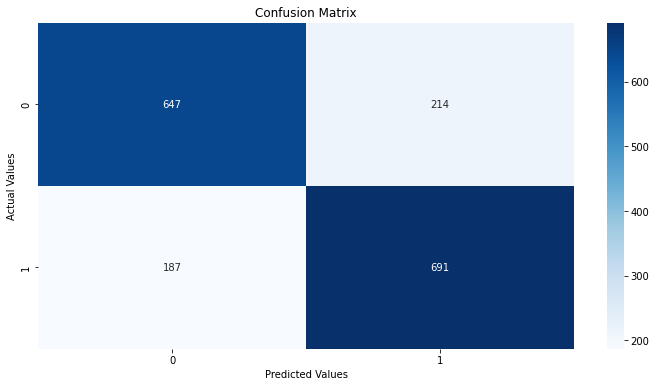

In [64]:
cm = confusion_matrix(y_test,predY)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap = 'Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predY))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       861
           1       0.76      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [66]:
predictions = clf.predict(test_data1)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype='<U5')

In [67]:
output = pd.DataFrame({'PassengerId': test_data1.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
